# Identifying a time series

Which of the following data sets is considered time series data?

- Test grades for the last fall and spring semesters of high-school students.
- A student's attendance record each week of the semester.
- The school's national annual ranking since 2000.


# Plotting a time series (I)

In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, data and data2 are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

Note: This course assumes some familiarity with time series data, as well as how to use them in data analytics pipelines. For an introduction to time series, we recommend the Introduction to Time Series Analysis in Python and Visualizing Time Series Data with Python courses.

In [7]:
import pandas as pd
data = pd.read_csv("dataset/prices.csv")


In [8]:
# Print the first 5 rows of data
print(data.head())

         date symbol       close       volume
0  2010-01-04   AAPL  214.009998  123432400.0
1  2010-01-04    ABT   54.459951   10829000.0
2  2010-01-04    AIG   29.889999    7750900.0
3  2010-01-04   AMAT   14.300000   18615100.0
4  2010-01-04   ARNC   16.650013   11512100.0


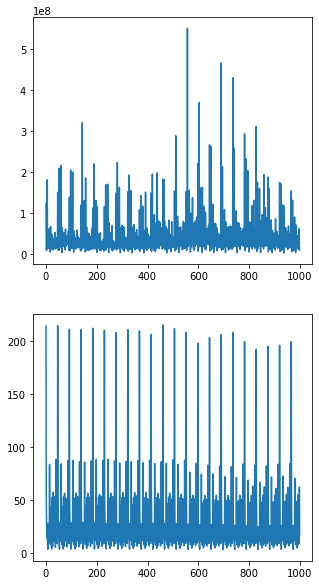

In [10]:
import matplotlib.pyplot as plt
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000,3].plot(y="data_values", ax=axs[0])
data.iloc[:1000,2].plot(y="data_values", ax=axs[1])
plt.show()

# Plotting a time series (II)

You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.

In [14]:
data = pd.read_csv("dataset/prices.csv", parse_dates=["date"], index_col="date")


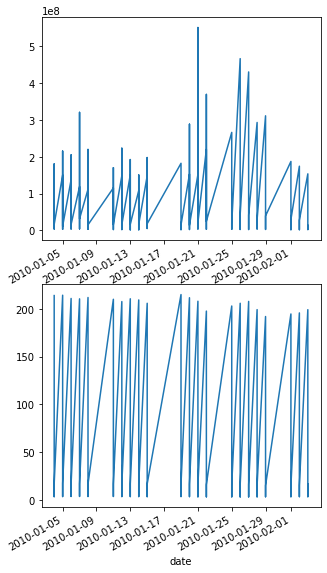

In [16]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000,2].plot(x="date", y="close", ax=axs[0])
data.iloc[:1000,1].plot(x="date", y="volume", ax=axs[1])
plt.show()

# Fitting a simple model: classification

In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

In [17]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

# Fit the model
model = LinearSVC()
model.fit(X, y)

C:\Users\88016\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

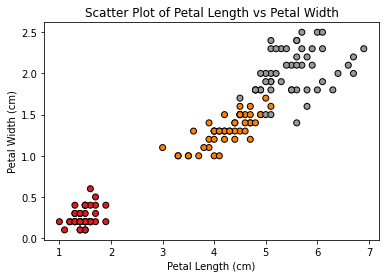

In [19]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Set labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs Petal Width')

# Show the plot
plt.show()


# Predicting using a classification model

Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable targets. Using the classifier you fit, you'll predict the type of each flower.

In [21]:
# Visualize predictions and actual values
X_predict = iris.data[:, 2:]  # Use the same columns for prediction
predictions = model.predict(X_predict)
print(predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


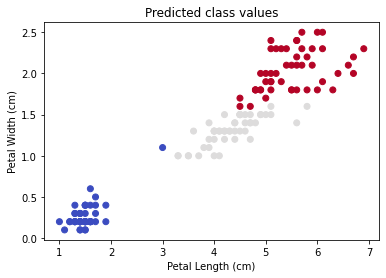

In [22]:
plt.scatter(X_predict[:, 0], X_predict[:, 1], c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

# Fitting a simple model: regression

In this exercise, you'll practice fitting a regression model using data from the California housing market. A DataFrame called housing is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

In [23]:
# from sklearn import linear_model

# # Prepare input and output DataFrames
# X = housing[["MedHouseVal"]]
# y = housing[["AveRooms"]]

# # Fit the model
# model = linear_model.LinearRegression()
# model.fit(X,y)

# Predicting using a regression model

Now that you've fit a model with the California housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

A 1-D array new_inputs consisting of 100 "new" values for "MedHouseVal" (median house value) is available in your workspace along with the model you fit in the previous exercise.

In [24]:
# # Generate predictions with the model using those inputs
# predictions = model.predict(new_inputs.reshape(-1,1))

# # Visualize the inputs and predicted values
# plt.scatter(new_inputs, predictions, color='r', s=3)
# plt.xlabel('inputs')
# plt.ylabel('predictions')
# plt.show()

# Inspecting the classification data

In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

In [30]:
# import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = glob('dataset/kaggle/set_a/*.wav')

audio_files[:3]

['dataset/kaggle/set_a\\artifact__201012172012.wav',
 'dataset/kaggle/set_a\\artifact__201105040918.wav',
 'dataset/kaggle/set_a\\artifact__201105041959.wav']

In [32]:
# import numpy as np
# # Read in the first audio file, create the time array
# audio, sfreq = lr.load(audio_files[0])
# time = np.arange(0, len(audio)) / sfreq

# # Plot audio over time
# fig, ax = plt.subplots()
# ax.plot(time, audio)
# ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
# plt.show()

# Inspecting the regression data

The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public Kaggle competition.

In [33]:
# Read in the data
data = pd.read_csv('dataset/prices.csv', index_col=0)

data.head()

,symbol,close,volume
date,,,
2010-01-04,AAPL,214.009998,123432400.0
2010-01-04,ABT,54.459951,10829000.0
2010-01-04,AIG,29.889999,7750900.0
2010-01-04,AMAT,14.300000,18615100.0
2010-01-04,ARNC,16.650013,11512100.0


           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


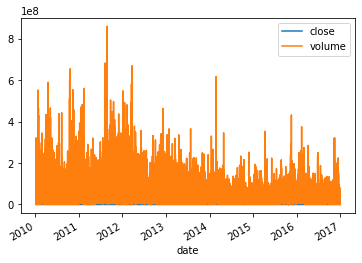

In [35]:
# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns[1:]:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()